# Laboratorio 3


Juan Camilo Gallego
CC: 1000098978

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

## Pregunta 1
Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|



In [2]:
Y=range(0,6)
X_1=range(0,6)
df=pd.DataFrame({'Y':Y,'X_1':X_1})
df['Entrenamiento']=[0,1,2,3,4,'m']
df.set_index('Entrenamiento',inplace=True)
df

,Y,X_1
Entrenamiento,,
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
m,5,5


## Pregunta 2
Crear una función para calcular la función de coste.

\begin{equation}
J(\theta_0, \theta_1)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}


In [3]:
def coste(Xi, Yi, theta0, theta1, m):
    sum = 0
    for i in range(len(Xi)-1):  
        sum += ((theta0 + theta1 * Xi[i]) - Yi[i]) ** 2
    return sum / (2 * m)

## Pregunta 3

Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.

valor min: 0.00020
valor theta1: 0.99099


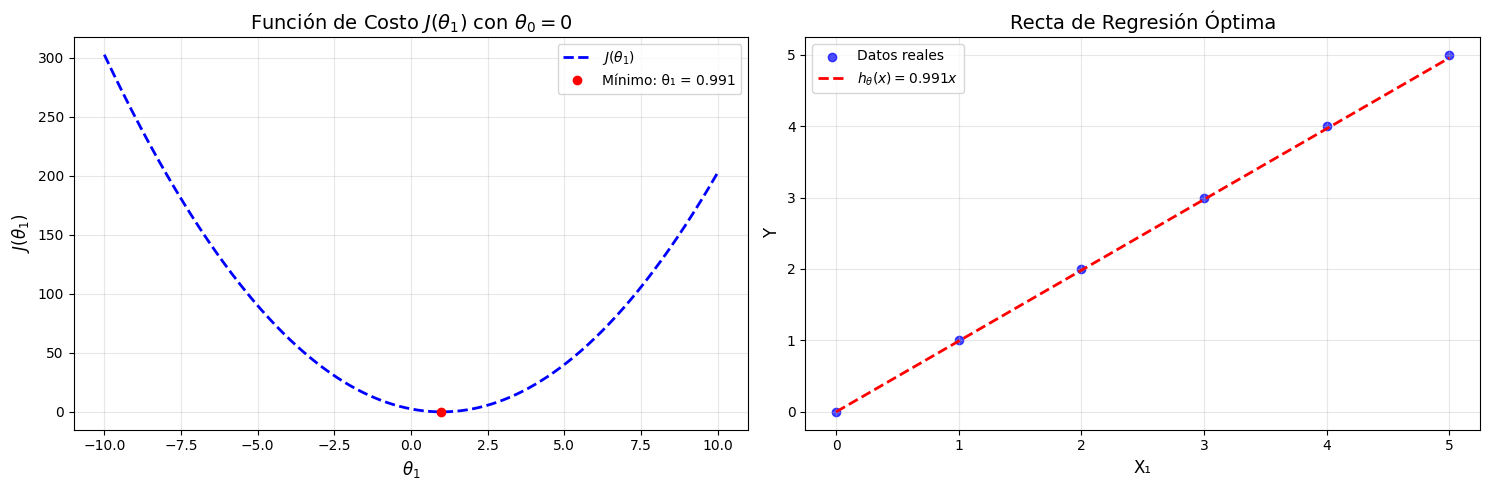

In [ ]:
theta0 = 0
theta1_values = np.linspace(-10,10,1000)
coste_values = coste(df['X_1'],df['Y'],theta0,theta1_values,len(df))
min_value = min(coste_values)
print(f'valor min: {min_value:.5f}')
theta1_min_value = theta1_values[np.argmin(coste_values)]
print(f'valor theta1: {theta1_min_value:.5f}')

plt.figure(figsize=(15, 5))

# Subplot 1: Función de costo
plt.subplot(121)
plt.plot(theta1_values, coste_values, 'b--', linewidth=2, label=r'$J(\theta_1)$')
plt.plot(theta1_min_value, min_value, 'ro', markersize=6, 
         label=f'Mínimo: θ₁ = {theta1_min_value:.3f}')

plt.title(r'Función de Costo $J(\theta_1)$ con $\theta_0 = 0$', fontsize=14)
plt.xlabel(r'$\theta_1$', fontsize=12)
plt.ylabel(r'$J(\theta_1)$', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()


y_pred = theta0 + theta1_min_value * df['X_1']

plt.subplot(122)
plt.scatter(df['X_1'], df['Y'], color='blue', label='Datos reales', alpha=0.7)
plt.plot(df['X_1'], y_pred, 'r--', linewidth=2, 
         label=fr'$h_\theta(x) = {theta1_min_value:.3f}x$')

plt.title('Recta de Regresión Óptima', fontsize=14)
plt.xlabel('X₁', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


## Pregunta 4

Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.

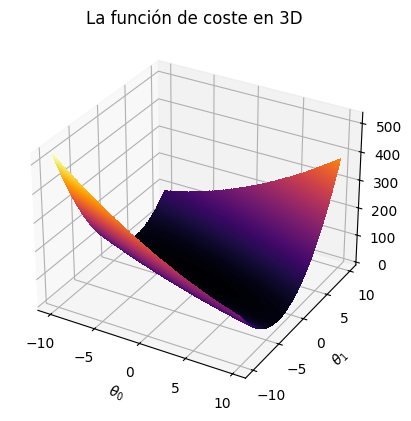

In [5]:
x=np.arange(-10,10,0.1)

t0,t1=np.meshgrid(x,x)
J=coste(df['X_1'],df['Y'],t0,t1,len(df))

fig = plt.figure()
ax = plt.axes(111,projection="3d")
ax.plot_surface(t0, t1, J )
ax.contourf(t0, t1, J, 200,   cmap="inferno")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("J")
ax.set_title("La función de coste en 3D")
plt.show()

## Pregunta 5

Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

## **Caso 1D: Solo θ₁ (con θ₀ = 0)**


$h_\theta(x) = \theta_1 x$

$J(\theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$

$J(\theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (\theta_1 x^{(i)} - y^{(i)})^2$

$J(\theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (\theta_1^2 (x^{(i)})^2 - 2\theta_1 x^{(i)} y^{(i)} + (y^{(i)})^2)$

$J(\theta_1) = \frac{\theta_1^2}{2m} \sum_{i=1}^{m} (x^{(i)})^2 - \frac{\theta_1}{m} \sum_{i=1}^{m} x^{(i)} y^{(i)} + \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)})^2$

### **Sustituyendo valores:**
$J(\theta_1) = \frac{\theta_1^2}{2 \times 5} \times 30 - \frac{\theta_1}{5} \times 30 + \frac{1}{2 \times 5} \times 30$

### **Expresión Final:**
$J(\theta_1) = 3\theta_1^2 - 6\theta_1 + 3$

---

## **Caso 2D: θ₀ y θ₁**


$h_\theta(x) = \theta_0 + \theta_1 x$

$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$

$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2$

$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} [\theta_0^2 + 2\theta_0\theta_1 x^{(i)} + \theta_1^2 (x^{(i)})^2 - 2\theta_0 y^{(i)} - 2\theta_1 x^{(i)} y^{(i)} + (y^{(i)})^2]$

$J(\theta_0, \theta_1) = \frac{1}{2m} \left[ m\theta_0^2 + 2\theta_0\theta_1 \sum x^{(i)} + \theta_1^2 \sum (x^{(i)})^2 - 2\theta_0 \sum y^{(i)} - 2\theta_1 \sum x^{(i)} y^{(i)} + \sum (y^{(i)})^2 \right]$

### **Sustituyendo valores:**
$J(\theta_0, \theta_1) = \frac{1}{10} \left[ 5\theta_0^2 + 2\theta_0\theta_1 \times 10 + \theta_1^2 \times 30 - 2\theta_0 \times 10 - 2\theta_1 \times 30 + 30 \right]$

$J(\theta_0, \theta_1) = \frac{1}{10} \left[ 5\theta_0^2 + 20\theta_0\theta_1 + 30\theta_1^2 - 20\theta_0 - 60\theta_1 + 30 \right]$

### **Expresión Final:**
$J(\theta_0, \theta_1) = \frac{1}{2}\theta_0^2 + 2\theta_0\theta_1 + 3\theta_1^2 - 2\theta_0 - 6\theta_1 + 3$


## Pregunta 6

Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

Máximo de iteraciones (5000) alcanzado
Alpha = 0.1:
  Mínimo: 4.000043
  Error: 0.000043
  Iteraciones: 50
  f(x_min) = 0.000000

Alpha = 0.01:
  Mínimo: 4.000050
  Error: 0.000050
  Iteraciones: 525
  f(x_min) = 0.000000

Alpha = 0.001:
  Mínimo: 4.000225
  Error: 0.000225
  Iteraciones: 5000
  f(x_min) = 0.000000



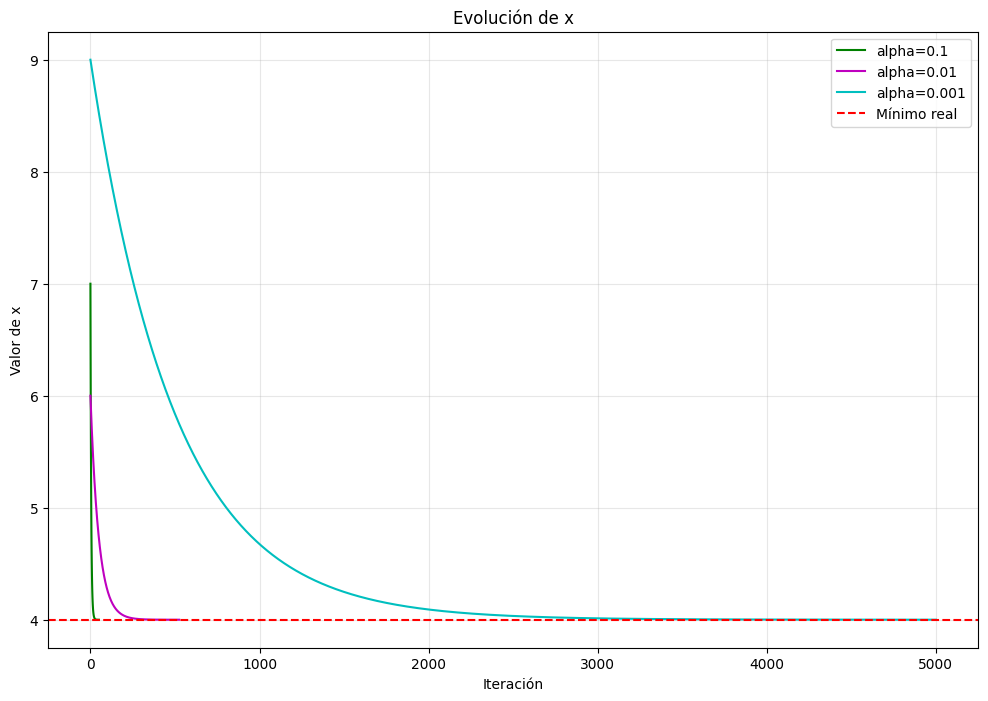

In [32]:
def gradiente_descendente_dif_finita(f, alpha, X, h=1e-4, epsilon=1e-4, max_iter=5000):
    wi = np.random.choice(X)
    historial = [wi]
    
    for i in range(max_iter):
        # Calcular gradiente con diferencia finita
        gradiente = (f(wi + h) - f(wi - h)) / (2 * h)
        
        if abs(gradiente) < epsilon:
            break
        
        wi_1 = wi - alpha * gradiente
        
        # Verificar overflow
        if np.isinf(wi_1) or np.isnan(wi_1):
            print(f"Overflow detectado en iteración {i+1}")
            break
            
        wi = wi_1
        historial.append(wi)
    
    else:
        print(f"Máximo de iteraciones ({max_iter}) alcanzado")
    
    return wi, historial

f = lambda x: (x-4)**2

alphas = [0.1, 0.01, 0.001]
X = np.arange(10)


resultados = {}

for alpha in alphas:
    x_min, historial = gradiente_descendente_dif_finita(f, alpha, X)
    resultados[alpha] = {
        'x_min': x_min,
        'historial': historial,
        'error': abs(x_min - 4),
        'iteraciones': len(historial) - 1
    }


for alpha in alphas:
    res = resultados[alpha]
    print(f"Alpha = {alpha}:")
    print(f"  Mínimo: {res['x_min']:.6f}")
    print(f"  Error: {res['error']:.6f}")
    print(f"  Iteraciones: {res['iteraciones']}")
    print(f"  f(x_min) = {f(res['x_min']):.6f}")
    print()

plt.figure(figsize=(12, 8))
colors = ['g','m','c']

for i, alpha in enumerate(alphas):
    historial = resultados[alpha]['historial']
    plt.plot(range(len(historial)), historial, f'{colors[i]}-', 
             label=f'alpha={alpha}')
    
plt.xlabel('Iteración')
plt.ylabel('Valor de x')
plt.title('Evolución de x')
plt.axhline(y=4, color='r', linestyle='--', label='Mínimo real')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Pregunta 7

Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.

Valor de un minimo de la función  -0.04198141603822075


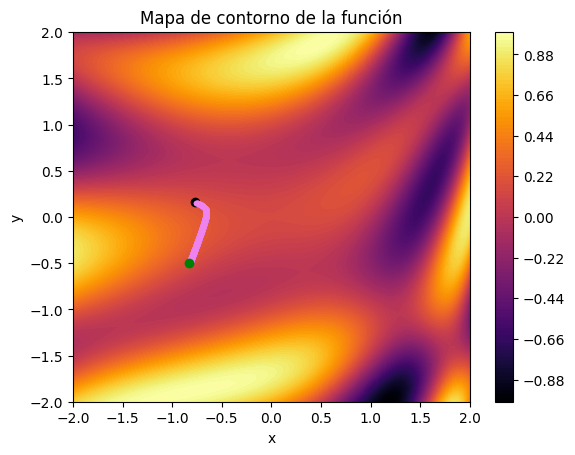

In [7]:

func= lambda th: np.sin(1 / 2 * th[0] ** 2-1/4 * th[1]**2 +3)*np.cos(2* th[0]+ 1-np.e ** th[1] )
res=100
X=np.linspace(-2,2,res)
Y=np.linspace(-2,2,res)
Z=np.zeros((res,res))

for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[ix,iy]=func([x,y])

plt.contourf(X,Y,Z,100, cmap='inferno')
plt.title("Mapa de contorno de la función")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()

Theta=np.random.rand(2)*4-2

T=np.copy(Theta)
plt.plot(Theta[0],Theta[1], 'o',c='black')
lr=0.01
h=0.001
grad=np.zeros(2)

for i in range(10000):
  for it,th in enumerate(Theta):

    T=np.copy(Theta)

    T[it]=T[it]+h
    diff=(func(T)-func(Theta))/h
    grad[it]=diff

  Theta=Theta -lr*grad
  if (i%100):
    plt.plot(Theta[0],Theta[1], '.',c='violet')
plt.plot(Theta[0],Theta[1], 'o',c='green')

print('Valor de un minimo de la función ',func(Theta))

plt.show()

Se logra apreciar que este metodo intenta encontrar un minimo local de la funcion

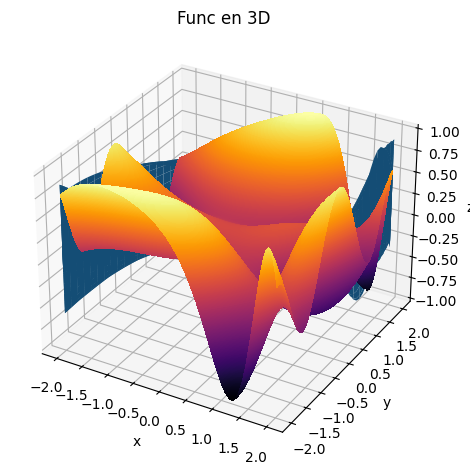

In [8]:
ax = plt.axes(111,projection="3d")
ax.plot_surface(X, Y, Z )
ax.contourf(X, Y, Z, 500,   cmap="inferno")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Func en 3D")
plt.tight_layout()
plt.show()

## Pregunta 8

# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}


    Empleando los siguientes datos :

X = np.linspace(0, 1, 100)


y = 0.2 + 0.2*X + 0.02*np.random.random(100)

y las herramientas desarrolladas en los apartados anteriores, construya un algorítmo que permita determinar una regresión lineal.

Valor de un minimo de la función  1.8118774586974268e-05
Valor de theta 0  0.2113390156246095
Valor de theta 1  0.19470579165684745


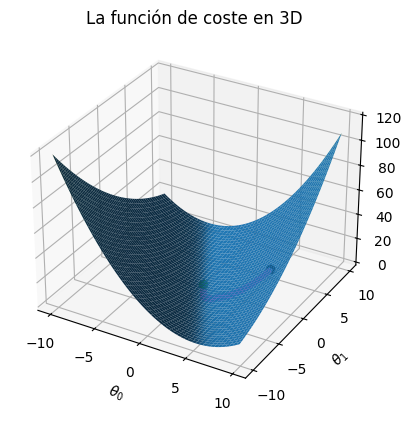

In [ ]:
X = np.linspace(0, 1, 100)
y = lambda X: 0.2 + 0.2*X + 0.02*np.random.random(100)
Y = y(X)

def coste(Xi, Yi, theta0, theta1, m):
    sum = 0
    for i in range(len(Xi)-1):  
        sum += ((theta0 + theta1 * Xi[i]) - Yi[i]) ** 2
    return sum / (2 * m)

x=np.arange(-10,10,0.1)

t0,t1=np.meshgrid(x,x)
J=coste(X,Y,t0,t1,len(X))

Theta=np.random.rand(2)*20-10
ax = plt.axes(111,projection="3d")
ax.contour(t0, t1, J, 200,   linestyles="dotted", alpha=0.3, linewidths=0.5)

T=np.copy(Theta)
plt.plot(Theta[0],Theta[1],coste(X, Y, Theta[0], Theta[1], len(X)),  'o',c='black')
lr=0.01
h=0.001
grad=np.zeros(2)

for i in range(10000):
  for it,th in enumerate(Theta):

    T=np.copy(Theta)

    T[it]=T[it]+h
    diff=(coste(X,Y,T[0],T[1],len(X)) - coste(X,Y,Theta[0],Theta[1],len(X)))/h
    grad[it]=diff

  Theta=Theta -lr*grad
  if (i%100):
    plt.plot(Theta[0],Theta[1], coste(X, Y, Theta[0], Theta[1], len(X)), '.',c='violet')

print('Valor de un minimo de la función ',coste(X, Y, Theta[0], Theta[1], len(X)) )
print('Valor de theta 0 ', Theta[0] )
print('Valor de theta 1 ', Theta[1] )

ax.plot_surface(t0, t1, J )
plt.plot(Theta[0],Theta[1], coste(X, Y, Theta[0], Theta[1], len(X)), 'o',c='green')
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("J")
ax.set_title("La función de coste en 3D")
plt.show()

Se logra apreciar la trayectoria que toma el algoritmo y como busca llegar al minimo de la funcion

## Pregunta 9

Compare su resultado empleando la libreria linearRegresion() de sklearn.

In [13]:
fit=LinearRegression()
fit.fit(X.reshape(-1,1),Y.reshape(-1,1))

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
coef, intercept = fit.coef_,fit.intercept_

# suponiendo que sklearn encuentra el valor real
print(f"El error para el intercepto es {(abs(intercept-Theta[0])/intercept)*100} %")
print(f"El error para la pendiente es {(abs(coef-Theta[1])/coef)*100} %")

El error para el intercepto es [0.43141525] %
El error para la pendiente es [[1.24818094]] %


Se obtuvo un error bajo, por tanto se puede afirmar que el descenso del gradiente nos da un buen resultado con rapida convergencia para un caso sencillo como este.